### Decision Tree classifier implementation with post prunning¶ 🟠🟢🔵🟣🔴

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from sklearn.datasets import load_iris

In [18]:
dataset = load_iris()

In [19]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
## we can also import the dataset from seaborn package

In [21]:
import seaborn as sns

In [22]:
df = sns.load_dataset('iris')

In [23]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [24]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
## independant and dependant features

In [26]:
x = df.iloc[:,:-1] 
y = dataset.target

In [27]:
x

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [28]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
## train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.33, random_state= 42)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
## post prunning
treeclassifier = DecisionTreeClassifier()

In [32]:
treeclassifier.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.58

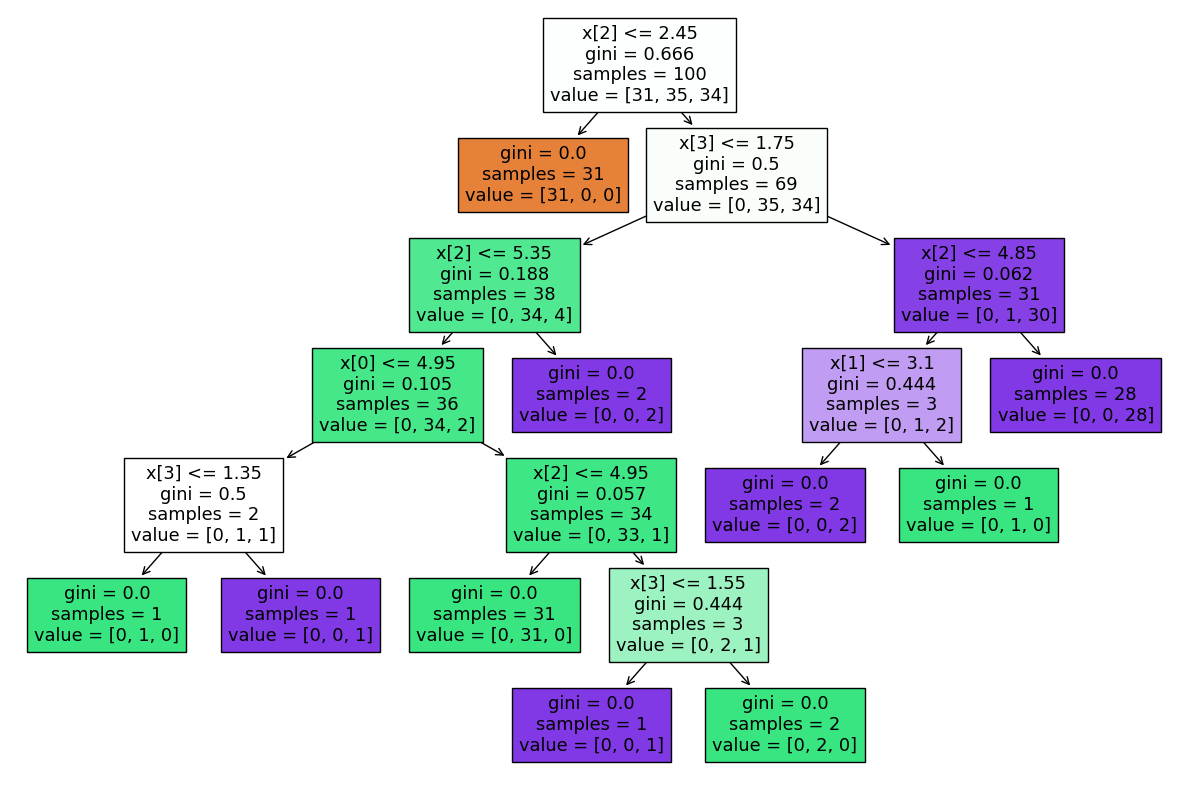

In [33]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier, filled=True)

In [34]:
## post prunning with max_depth = 2
treeclassifier = DecisionTreeClassifier(max_depth=2)
treeclassifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

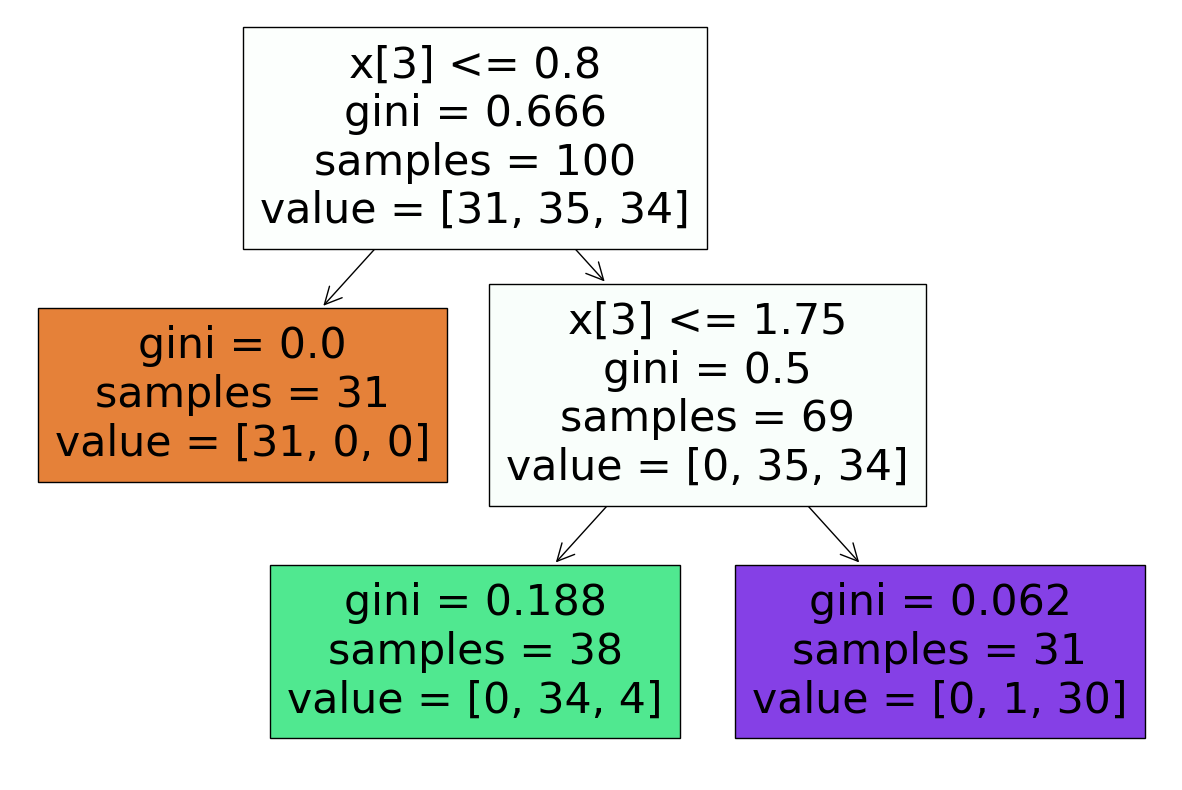

In [35]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier, filled=True)

In [36]:
## prediction
y_pred = treeclassifier.predict(x_test)

In [37]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [38]:
from sklearn.metrics import accuracy_score, classification_report

In [39]:
score = accuracy_score(y_pred, y_test)
print(score)

0.98


In [40]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [41]:
### internal assignment
## create a decision tree
from sklearn.datasets import load_breast_cancer

In [42]:
dataset = load_breast_cancer()

In [43]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [44]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [45]:
df = pd.DataFrame(dataset.data, columns= dataset.feature_names)

In [46]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [47]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [48]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [49]:
## dependent and independent features

In [50]:
x = df.iloc[:,:] 
y = dataset.target

In [51]:
x.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [52]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [53]:
## train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.33, random_state= 42)

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
treeclassifier = DecisionTreeClassifier()

In [57]:
treeclassifier.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5384615384615384, 0.9375, 'x[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(0.36538461538461536, 0.8125, 'x[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(0.2692307692307692, 0.6875, 'x[10] <= 0.626\ngini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(0.19230769230769232, 0.5625, 'x[24] <= 0.178\ngini = 0.027\nsamples = 216\nvalue = [3, 213]'),
 Text(0.15384615384615385, 0.4375, 'x[14] <= 0.003\ngini = 0.018\nsamples = 215\nvalue = [2, 213]'),
 Text(0.07692307692307693, 0.3125, 'x[14] <= 0.003\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.038461538461538464, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.11538461538461539, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.3125, 'x[21] <= 33.35\ngini = 0.009\nsamples = 211\nvalue = [1, 210]'),
 Text(0.19230769230769232, 0.1875, 'gini = 0.0\nsamples = 199\nvalue = [0, 199]'),
 Text(0.2692307692307692, 0.1875, 'x[21] <= 34.5\ngini 

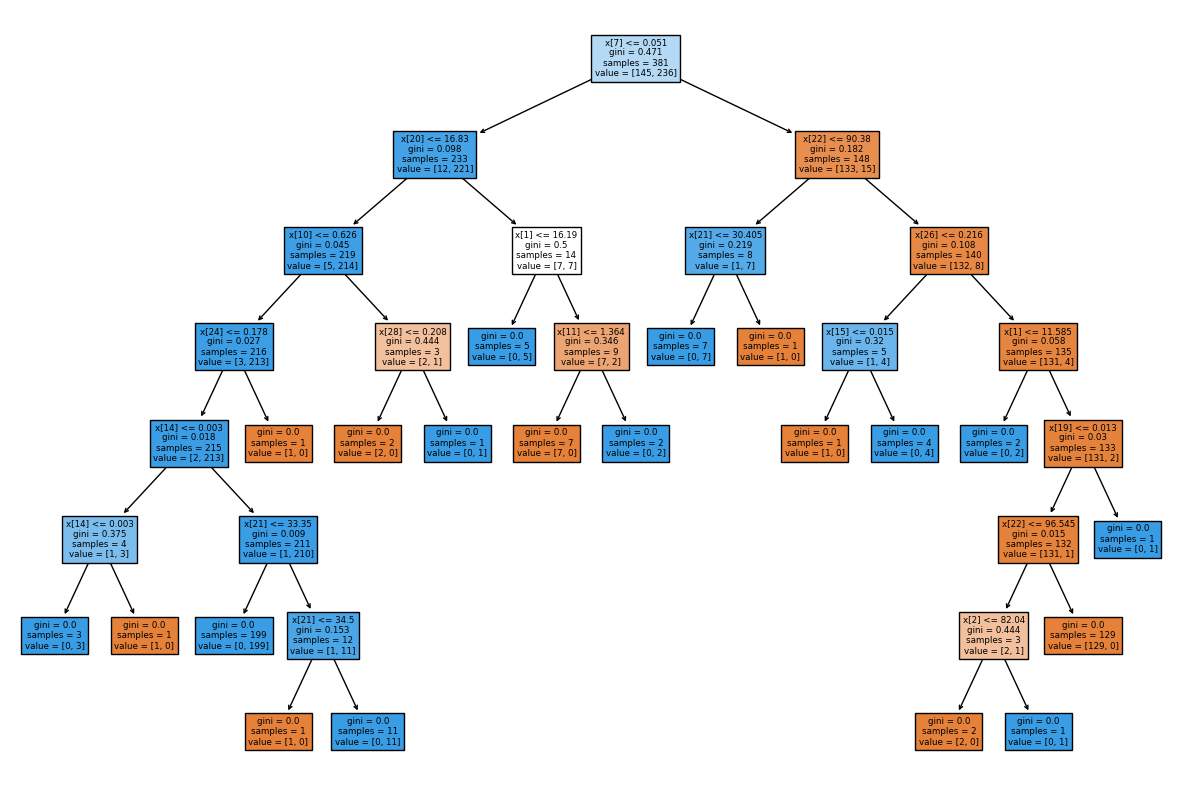

In [58]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier, filled=True)

In [59]:
## post prunning with max_depth = 2
treeclassifier = DecisionTreeClassifier(max_depth=2)
treeclassifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(0.25, 0.5, 'x[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.75, 0.5, 'x[22] <= 90.38\ngini = 0.182\nsamples = 148\nvalue = [133, 15]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.108\nsamples = 140\nvalue = [132, 8]')]

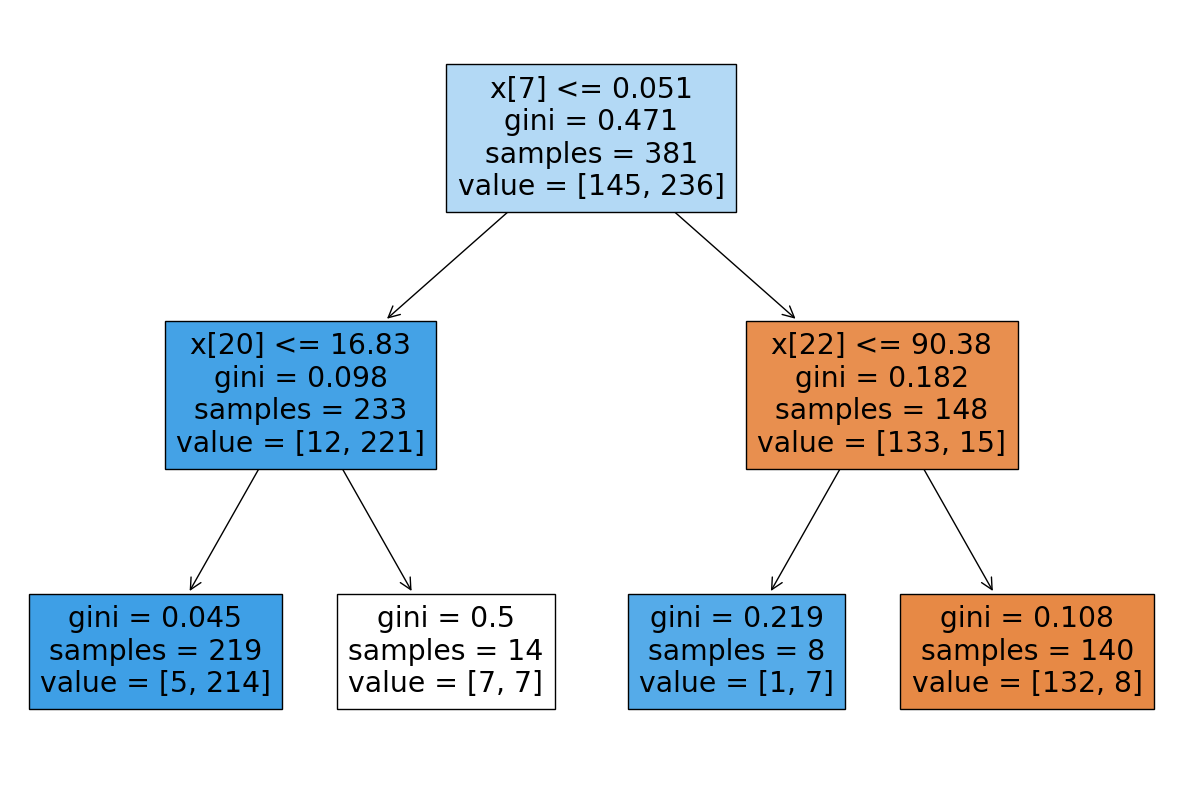

In [60]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier, filled=True)

In [61]:
## prediction
y_pred = treeclassifier.predict(x_test)

In [62]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [63]:
from sklearn.metrics import accuracy_score, classification_report

In [64]:
score = accuracy_score(y_pred, y_test)

In [65]:
print(score)

0.925531914893617


In [66]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        77
           1       0.90      0.98      0.94       111

    accuracy                           0.93       188
   macro avg       0.94      0.91      0.92       188
weighted avg       0.93      0.93      0.92       188



### Desicion Tree Prepruning and hyperparameter tuning for huge data

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
parameter ={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
treeclassifier = DecisionTreeClassifier()

In [71]:
clf = GridSearchCV(treeclassifier, param_grid= parameter, cv =5, scoring = 'accuracy')

In [72]:
## train the data
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [73]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [74]:
y_pred = clf.predict(x_test)

In [75]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [77]:
score = accuracy_score(y_pred, y_test)

In [78]:
score

0.9521276595744681

In [79]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        70
           1       0.95      0.97      0.96       118

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



### Decision tree regressor Implementation

In [80]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [81]:
## Boston house pricing dataset
from sklearn.datasets import fetch_california_housing
california_df = fetch_california_housing()

In [82]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [83]:
## independent features
x = pd.DataFrame(california_df.data, columns= california_df.feature_names)
## dependent features
y = california_df.target

In [84]:
x.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [85]:
## train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state= 42)

In [86]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [87]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [88]:
y_pred = regressor.predict(x_test)

In [89]:
y_pred

array([0.487  , 0.661  , 5.00001, ..., 1.222  , 1.387  , 4.5    ])

In [90]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)

In [91]:
score

0.5963588023249393

In [92]:
## hyperparameter tunning

parameter ={
    'criterion':['sqaured_error', 'friedman_mse', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5,6,7,8,10,11,12],
    'max_features': ['auto', 'sqrt', 'log2']
}
regressor = DecisionTreeRegressor()

In [93]:
import warnings
warnings.filterwarnings('ignore')
regressorcv = GridSearchCV(regressor, param_grid=parameter, cv = 5, scoring = 'neg_mean_squared_error')

In [94]:
regressorcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['sqaured_error', 'friedman_mse',
                                       'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [95]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 8,
 'max_features': 'auto',
 'splitter': 'best'}

In [96]:
y_pred = regressorcv.predict(x_test)

In [97]:
r2_score(y_pred, y_test)

0.5977125286321747

### support vector classifier implementation 🟠🟢🔵🟣🔴

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
## lets create a synthetic data points
from sklearn.datasets import make_classification

In [104]:
x,y = make_classification(n_samples= 1000, n_features= 2, n_classes=2,n_clusters_per_class=2, n_redundant=0)

In [105]:
x

array([[-0.31003318, -0.1643532 ],
       [ 0.4840032 ,  0.39076588],
       [ 0.85349304, -1.08666416],
       ...,
       [ 0.29879538,  0.08679776],
       [-1.26716794, -0.61852335],
       [-0.6672845 ,  0.78855354]])

In [106]:
y

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

In [107]:
pd.DataFrame(x)[0]

0     -0.310033
1      0.484003
2      0.853493
3      0.600521
4     -1.175782
         ...   
995    2.068634
996    1.006810
997    0.298795
998   -1.267168
999   -0.667285
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

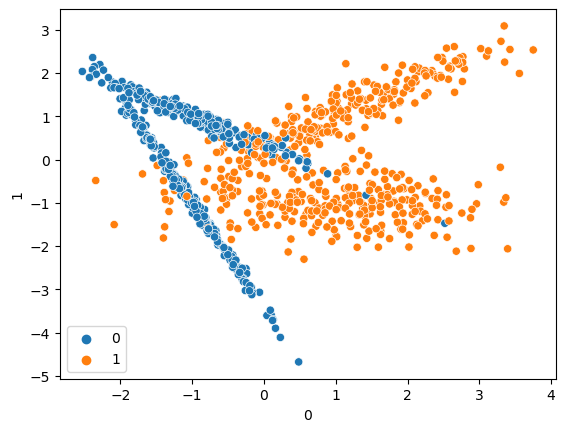

In [108]:
sns.scatterplot(x = pd.DataFrame(x)[0], y =pd.DataFrame(x)[1], hue = y)

In [109]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=10)

In [110]:
from sklearn.svm import SVC

In [111]:
svc = SVC(kernel= 'linear')

In [112]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [113]:
svc.coef_

array([[1.92919294, 0.19107481]])

In [114]:
# prediction
y_pred = svc.predict(x_test)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [116]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       122
           1       0.95      0.81      0.87       128

    accuracy                           0.88       250
   macro avg       0.89      0.88      0.88       250
weighted avg       0.89      0.88      0.88       250

[[116   6]
 [ 24 104]]
0.88


### hyperparameter tunning with SVC

In [117]:
from sklearn.model_selection import GridSearchCV

## defining parameter range 
param_grid = {'C':[0.1,1,10,100,1000],
             'gamma': [1,0.1,0.01,0.001,0.0001]}

In [118]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit = True, cv =5, verbose=3)

In [119]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.920 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.907 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.920 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.933 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.940 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.893 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.893 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.920 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.920 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.860 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END .................C=1000, gamma=0.1;, score=0.920 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.927 total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.953 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.940 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.920 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.907 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.913 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.927 total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.01;, score=0.947 total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.001;, score=0.913 total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.001;, score=0.893 total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [120]:
grid.best_params_

{'C': 100, 'gamma': 1}

In [121]:
## prediction 
y_pred4 = grid.predict(x_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(accuracy_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       122
           1       1.00      0.89      0.94       128

    accuracy                           0.94       250
   macro avg       0.95      0.95      0.94       250
weighted avg       0.95      0.94      0.94       250

[[122   0]
 [ 14 114]]
0.944


### support vector Regressor implementation 🟠🟢🔵🟣🔴

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
## lets create a synthetic data points
from sklearn.datasets import make_regression

In [141]:
x,y = make_regression(n_samples= 1000, n_features= 2, n_targets=1,noise=3.0)

In [142]:
x

array([[-0.51121714, -0.20815188],
       [ 0.94823946, -0.18545873],
       [ 1.02023591,  0.90600253],
       ...,
       [ 1.99041157, -0.31880608],
       [-0.98830404, -1.27189531],
       [ 0.0553418 , -0.55212744]])

In [143]:
y

array([-4.41301452e+01,  6.99438081e+01,  7.85672494e+01,  4.42935899e+00,
       -7.71507678e+01,  7.38268862e-01,  4.50036865e+00, -1.39794694e+02,
        8.71446354e+01, -2.55805225e+01,  6.37160384e+01,  7.66549636e+01,
        4.22018225e+01, -1.13551040e+01,  4.94938595e+01, -1.59840815e+01,
       -3.05143296e+01,  2.82353753e+01,  1.08229530e+02,  3.56805293e+01,
       -2.60292718e+01,  1.40639457e+01,  8.42098015e+01, -1.41357880e+02,
        9.00148409e+00, -1.03979478e+02,  4.98896493e+01,  1.07984653e+02,
        8.02069704e+01, -8.57999863e+00, -8.65521464e+01,  6.85885430e+00,
        9.05443778e+01,  2.23749298e+02, -6.95779614e+01, -4.13724866e+01,
       -6.96265394e+01, -7.81767144e+01,  2.02685043e+01, -2.14214992e+02,
        6.13901819e+01,  9.99911662e+00, -6.89072471e+01,  5.38917074e+01,
        8.79804213e+01,  9.90138559e+00, -4.50522901e+01, -5.96296684e+01,
        9.91985489e+01, -1.66131463e+02, -1.14062935e+01,  2.69626873e+01,
        1.09237576e+02, -

In [144]:
pd.DataFrame(x)[0]

0     -0.511217
1      0.948239
2      1.020236
3      0.145331
4     -0.980305
         ...   
995   -1.325487
996    2.150301
997    1.990412
998   -0.988304
999    0.055342
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

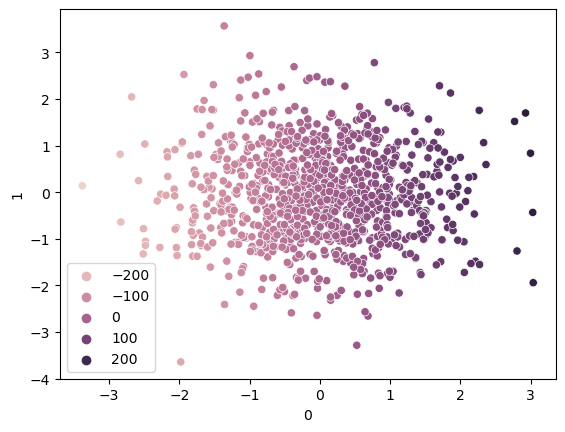

In [145]:
sns.scatterplot(x = pd.DataFrame(x)[0], y =pd.DataFrame(x)[1], hue = y)

In [146]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=10)

In [147]:
from sklearn.svm import SVR

In [148]:
svr = SVR(kernel= 'linear')

In [149]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [150]:
svr.coef_

array([[76.18862284,  5.83791433]])

In [151]:
# prediction
y_pred = svr.predict(x_test)

In [152]:
y_pred

array([  51.23036444,   27.93524839,  -58.71928999,   74.29247569,
         68.72781333,  -70.84669305,  109.62481707,  111.18559808,
         78.77984793,  -37.37825662,  -24.75250277,  -24.70833456,
         98.84648897,   44.83188629,   98.63498605,   76.20737383,
         64.2164238 ,   42.0332248 ,   -9.44901914,    7.27542142,
       -100.84035162,  -12.44434932, -117.52572639,   72.4734296 ,
         67.29781837,  -27.36241312,   27.06147893,   38.83833855,
        164.6257049 ,   27.74613495,   -2.36924581,   32.62138804,
         74.82517114,   35.38648222,   15.99118534,   13.88165421,
        -39.18076284,   66.64888344,   28.96571564,  -63.55853681,
         48.13683993,  150.2433804 ,   11.74168979, -109.44232042,
         17.87249839,  -68.66972689,   24.22186008,  -28.68427645,
        -45.45077031,  -69.98427563,  104.27105758,  -10.63378869,
        -76.47815725,  -36.41496224,  122.1932954 ,  -45.0061148 ,
         13.2513787 , -135.51475076,   16.88926139,   81.88916

In [153]:
from sklearn.metrics import r2_score

In [154]:
print(r2_score(y_test, y_pred))

0.9986187018142563


### Hyperparameter tunnning with SVR

In [155]:
from sklearn.model_selection import GridSearchCV

## defining parameter range 
param_grid = {'C':[0.1,1,10,100,1000],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel': ['linear'],
             'epsilon':[0.1,0.2,0.3] }

In [156]:
grid = GridSearchCV(SVR(), param_grid=param_grid, refit = True, cv =5, verbose=3)

In [157]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.844 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.848 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.851 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.844 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.847 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.844 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.848 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.851 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.844 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.847 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon

[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.3, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.3, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.3, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.3, gamma=1, kernel=linear;, score=0.998 total time=   0.0s
[CV

[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.998 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.998 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.998 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.998 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.998 

[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.998 total time=   0.2s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [158]:
grid.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [160]:
## prediction 
y_pred4 = grid.predict(x_test)
print(r2_score(y_test, y_pred4))

0.9986496629732082


### SVM kernels implementations 🟠🟢🔵🟣🔴

In [162]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x, -x])

In [168]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1, -x1])

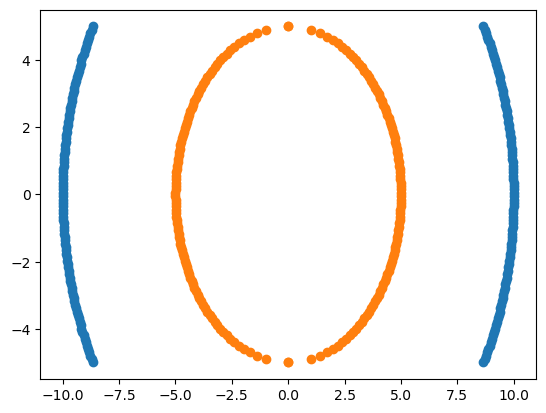

In [169]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [172]:
import pandas as pd 
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=['x1','x2'])
df1['y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=['x1','x2'])
df2['y'] = 1
df = pd.concat([df1, df2])
df.head()

x1       x2  y
0  8.660254 -5.00000  0
1  8.717792 -4.89899  0
2  8.773790 -4.79798  0
3  8.828277 -4.69697  0
4  8.881281 -4.59596  0

In [173]:
df.tail()

x1       x2  y
195 -1.969049 -4.59596  1
196 -1.714198 -4.69697  1
197 -1.406908 -4.79798  1
198 -0.999949 -4.89899  1
199 -0.000000 -5.00000  1

### polynomial kernel

In [174]:
## based on the formula find the polynomial kernel

In [175]:
df['x1_Square']= df['x1']**2
df['x2_Square']= df['x2']**2
df['x1*x2']= df['x1']* df['x2']
df.head()

x1       x2  y  x1_Square  x2_Square      x1*x2
0  8.660254 -5.00000  0  75.000000  25.000000 -43.301270
1  8.717792 -4.89899  0  75.999898  24.000102 -42.708375
2  8.773790 -4.79798  0  76.979390  23.020610 -42.096467
3  8.828277 -4.69697  0  77.938476  22.061524 -41.466150
4  8.881281 -4.59596  0  78.877155  21.122845 -40.818009

In [176]:
# dependent and independent features
x = df[['x1_Square', 'x2_Square', 'x1*x2']]
y = df['y']

In [177]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state= 0)


In [178]:
x_train.head()

x1_Square  x2_Square      x1*x2
50   24.997449   0.002551   0.252512
63   98.140496   1.859504  13.508984
112  10.651974  14.348026 -12.362637
159  99.079176   0.920824   9.551676
83   13.549638  11.450362  12.455852

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
!pip install plotly

PermissionError: [WinError 5] Access is denied

In [182]:
df.head()

x1       x2  y  x1_Square  x2_Square      x1*x2
0  8.660254 -5.00000  0  75.000000  25.000000 -43.301270
1  8.717792 -4.89899  0  75.999898  24.000102 -42.708375
2  8.773790 -4.79798  0  76.979390  23.020610 -42.096467
3  8.828277 -4.69697  0  77.938476  22.061524 -41.466150
4  8.881281 -4.59596  0  78.877155  21.122845 -40.818009

In [184]:
import plotly.express as px
fig = px.scatter_3d(df, x = 'x1_Square', y = 'x2_Square', z = 'x1*x2', color = 'y')
fig.show()
plt.show()

In [185]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

#### Radial basis function kernel

In [186]:
# independent features

x= df.iloc[:,0:2]
y = df.y

In [187]:
x.head()

x1       x2
0  8.660254 -5.00000
1  8.717792 -4.89899
2  8.773790 -4.79798
3  8.828277 -4.69697
4  8.881281 -4.59596

In [188]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: y, Length: 400, dtype: int64

In [189]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [190]:
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [191]:
classifier = SVC(kernel = 'poly')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.59

#### sigmoid kernel

In [192]:
classifier = SVC(kernel = 'sigmoid')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.51

### Naive Bayes Practical implementation 🟠🟢🔵🟣🔴

In [1]:
from sklearn.datasets import load_iris

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
x,y = load_iris(return_X_y= True)

In [5]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [8]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()

In [9]:
gnb.fit(x_train, y_train)

GaussianNB()

In [10]:
y_pred = gnb.predict(x_test)

In [11]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

1.0


### End to project Decision tree SVC 🟣🔴🔵🟢🟠

#### Diabetic dataset

In [17]:
## lets start with importing neccesary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# read the data file
data = pd.read_csv("diabetes.csv")

In [19]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [20]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [22]:
## check the null values in the data
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
# here few misconception is there like BMI can not be zero , glucose, insuline can not be zero
## now replacing zero values with the mean of the column

In [25]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [27]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<Axes: >

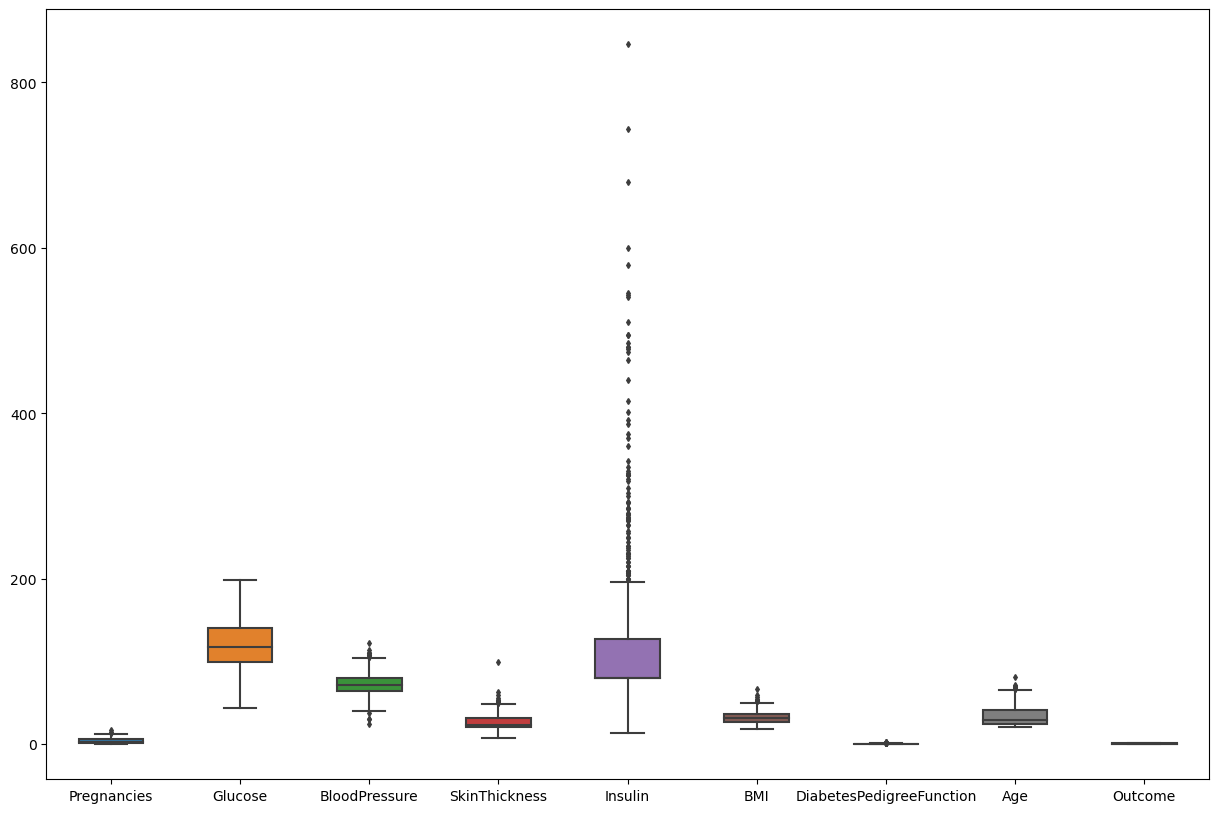

In [28]:
# now we have deal with the 0 values and data looks better. but there still are outliers present in some columns. lets visualize this outliers
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize= 3)

In [29]:
## segregate the dependent and independent variables
x = data.drop(columns= ['Outcome'])
y = data['Outcome']

In [30]:
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [32]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [33]:
 ## separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)
x_train.shape, x_test.shape

((576, 8), (192, 8))

In [34]:
import pickle
# standard scaling standrdization
def scaler_standard(x_train, x_test):
    # scaling data 
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    ## saving the model
    file = open('C:\\Users\\Priyanka\\Desktop\\Priyanka python\\standardscaler_diabetes.pkl', 'wb')
    pickle.dump(scaler, file)
    file.close()
    
    return x_train_scaled, x_test_scaled

In [35]:
x_train_scaled, x_test_scaled = scaler_standard(x_train, x_test)

In [36]:
x_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

#### decision tree model trainning with hyperparameter tunning


In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
parameter  ={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [39]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()

In [40]:
 clf = GridSearchCV(classifier, param_grid=parameter, cv = 5, scoring='accuracy', verbose=3)

In [41]:
clf.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.612 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.548 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.626 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.638 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitte

[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, splitter=best;, score=0.672 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, splitter=best;, score=0.774 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, splitter=best;, score=0.739 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, splitter=best;, score=0.652 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, splitter=best;, score=0.757 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, splitter=random;, score=0.690 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, splitter=random;, score=0.670 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, splitter=random;, score=0.713 total time=   0.0s
[CV 5/5] END criteri

[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, splitter=random;, score=0.643 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, splitter=random;, score=0.730 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.629 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.791 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.713 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.687 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.652 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.603 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.617 total time= 

[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=0.730 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=0.652 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=0.687 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.664 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.722 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.583 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.696 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.713 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.724 total time

[CV 2/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=best;, score=0.791 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=best;, score=0.626 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=best;, score=0.687 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=best;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.696 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.670 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.643 t

[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best;, score=0.696 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=best;, score=0.696 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.698 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.722 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.687 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.713 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best;, score=0.698 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best;, score=0.722 t

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [42]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [45]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt', splitter='best')

In [46]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [47]:
y_pred = classifier.predict(x_test_scaled)

In [48]:
## accuracy score
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[130,   0],
       [ 62,   0]], dtype=int64)

In [49]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [50]:
Accuracy = (true_positive + true_negative)/ (true_positive+false_positive+false_negative+true_negative)

In [51]:
Accuracy

0.6770833333333334

In [53]:
precision = true_positive/(true_positive+false_positive)

In [54]:
precision

1.0

In [55]:
recall = true_positive/(true_positive+false_negative)

In [56]:
recall

0.6770833333333334

In [57]:
f1_score = 2*(recall*precision)/(recall+precision)

In [58]:
f1_score

0.8074534161490683

In [61]:
import pickle
file = open('modelfordecisiontreeand svc.pkl', 'wb')
pickle.dump(classifier,file)
file.close()

#### support vector classifier with hyperparameter tunning

In [62]:
## defiining parameter range
param_grid = {
    'C': [0.1,1,10,100,1000],
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'kernel': ['linear', 'rbf', 'polynomial']
}

In [64]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit = True, cv = 5, verbose=3, scoring='accuracy')

In [65]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.767 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.817 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.739 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.713 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.783 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomi

[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.767 total time=   2.1s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.817 total time=   1.4s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.739 total time=   1.3s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.704 total time=   0.7s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.783 total time=   0.7s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.696 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.635 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.01, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.

[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.750 total time=  12.0s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.809 total time=  11.2s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.730 total time=   6.4s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.696 total time=  20.9s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.774 total time=  15.1s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.791 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.696 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.696 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.730 total time=   0.0s
[CV 1/5] END C=10, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END C=10, gamma=0

[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.759 total time=  46.2s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.791 total time= 1.2min
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.722 total time=  40.9s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.722 total time= 1.5min
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.774 total time=  44.3s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.638 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END C=1000, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END C=1000, gamma=0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=3)

In [66]:
   grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

In [69]:
svc_clf = SVC(C = 100, gamma =1, kernel= 'linear')

In [75]:
svc_clf.fit(x_train, y_train)

SVC(C=100, gamma=1, kernel='linear')

In [76]:
## decision tree prediction
y_pred = classifier.predict(x_test_scaled)

In [77]:
## SVC prediction

In [78]:
y_pred_svc = svc_clf.predict(x_test_scaled)

In [81]:
## accuracy score for decision tree
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[130,   0],
       [ 62,   0]], dtype=int64)

In [80]:
## accuracy score for svc
conf_mat = confusion_matrix(y_test, y_pred_svc)
conf_mat

array([[130,   0],
       [ 62,   0]], dtype=int64)

In [82]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [83]:
Accuracy = (true_positive + true_negative)/ (true_positive+false_positive+false_negative+true_negative)
Accuracy

0.6770833333333334

In [84]:
## naive bayes algorithm

In [86]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()

In [87]:
gnb.fit(x_train, y_train)

GaussianNB()

In [88]:
y_pred = gnb.predict(x_test)

In [89]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [92]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[113  17]
 [ 29  33]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       130
           1       0.66      0.53      0.59        62

    accuracy                           0.76       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192

0.7604166666666666


 ### Random forest classifier with pipeline and Hyperparameter tunning 🟠🟢🔵🟣🔴

In [1]:
  import seaborn as sns

In [2]:
df = sns.load_dataset('tips')

In [4]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [9]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [10]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [5]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [12]:
## dependent feature
df.time

0      Dinner
1      Dinner
2      Dinner
3      Dinner
4      Dinner
        ...  
239    Dinner
240    Dinner
241    Dinner
242    Dinner
243    Dinner
Name: time, Length: 244, dtype: category
Categories (2, object): ['Lunch', 'Dinner']

In [ ]:
## convert the categorical feature into the numerical feature

In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()

In [16]:
df['time'] = encoder.fit_transform(df['time'])

In [17]:
df.time.unique()

array([0, 1])

In [18]:
## independent and dependent feature

x = df.drop(labels=['time'], axis =1)
y = df.time

In [19]:
x

total_bill   tip     sex smoker   day  size
0         16.99  1.01  Female     No   Sun     2
1         10.34  1.66    Male     No   Sun     3
2         21.01  3.50    Male     No   Sun     3
3         23.68  3.31    Male     No   Sun     2
4         24.59  3.61  Female     No   Sun     4
..          ...   ...     ...    ...   ...   ...
239       29.03  5.92    Male     No   Sat     3
240       27.18  2.00  Female    Yes   Sat     2
241       22.67  2.00    Male    Yes   Sat     2
242       17.82  1.75    Male     No   Sat     2
243       18.78  3.00  Female     No  Thur     2

[244 rows x 6 columns]

In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Name: time, Length: 244, dtype: int32

In [21]:
## split the data for training and testing the model

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [31]:
 from sklearn.pipeline import Pipeline